In [7]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
from geopy.distance import geodesic

def calculate_box_coordinates(start_coord, distance_km):
    """
    Calculate the top left and bottom right coordinates of a square box given a starting point and the distance.

    Parameters:
    start_coord (tuple): Starting coordinates (latitude, longitude).
    distance_km (float): The distance in kilometers for one side of the box.

    Returns:
    (tuple, tuple): Coordinates (latitude, longitude) of the top left and bottom right corners of the box.
    """
    # Calculate the distance in km for one side of the box
    diagonal_distance = distance_km / (2 ** 0.5)

    # Calculate the top left coordinate
    top_left = geodesic(kilometers=diagonal_distance).destination(point=start_coord, bearing=315)

    # Calculate the bottom right coordinate
    bottom_right = geodesic(kilometers=diagonal_distance).destination(point=start_coord, bearing=135)

    return (top_left.latitude, top_left.longitude), (bottom_right.latitude, bottom_right.longitude)

# usage
start_coord = (42.17332, -74.60557333)
distance_km = 600
top_left, bottom_right = calculate_box_coordinates(start_coord, distance_km)
print("Top Left:", top_left, "Bottom Right:", bottom_right)


Top Left: (44.81249566665056, -78.39804613213938) Bottom Right: (39.41766069796198, -71.12227330815291)


In [4]:
def kernal_window_finder(image_width_px, image_height_px, covered_area_width_km, covered_area_height_km, target_area_width_km, target_area_height_km):
    """
    Calculate the pixel dimensions for a given kilometer area in an image, rounded to the nearest whole number.

    Parameters:
    image_width_px (int): Width of the image in pixels.
    image_height_px (int): Height of the image in pixels.
    covered_area_width_km (float): Width of the area covered by the image in kilometers.
    covered_area_height_km (float): Height of the area covered by the image in kilometers.
    target_area_width_km (float): Width of the target area in kilometers.
    target_area_height_km (float): Height of the target area in kilometers.

    Returns:
    (int, int): Width and height of the target area in pixels, rounded to the nearest whole number.
    """

    # The number of pixels per km in both dimensions
    pixels_per_km_width = image_width_px / covered_area_width_km
    pixels_per_km_height = image_height_px / covered_area_height_km

    # Calculating the pixel dimensions for the target area
    target_area_width_px = round(target_area_width_km * pixels_per_km_width)
    target_area_height_px = round(target_area_height_km * pixels_per_km_height)

    return target_area_width_px, target_area_height_px

# usage
reference_image_width_px = 21192
reference_image_height_px = 21203
distance_km = 600
query_image_width_km = 12
query_image_height_km = 8

width_px, height_px = kernal_window_finder(reference_image_width_px, reference_image_height_px, distance_km, distance_km, query_image_width_km, query_image_height_km)
print("Width in pixels:", width_px, ", Height in pixels:", height_px)


Width in pixels: 424 , Height in pixels: 283


In [1]:
from PIL import Image
import os

Image.MAX_IMAGE_PIXELS = None

def subsample_images(image_path, output_folder, window_width, window_height, stride_x, stride_y):
    """
    Generate subsampled images from a reference image using a sliding window and print the total number of images generated.

    Parameters:
    image_path (str): Path to the reference image.
    output_folder (str): Path to the folder where subsampled images will be saved.
    window_width (int): Width of the sliding window in pixels.
    window_height (int): Height of the sliding window in pixels.
    stride_x (int): Horizontal stride of the sliding window in pixels.
    stride_y (int): Vertical stride of the sliding window in pixels.
    """
    # Load the reference image
    image = Image.open(image_path)

    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Count the number of subsamples generated
    num_subsamples = 0

    # Iterate over the image using the sliding window
    for y in range(0, image.height - window_height + 1, stride_y):
        for x in range(0, image.width - window_width + 1, stride_x):
            # Extract the sub-image
            sub_image = image.crop((x, y, x + window_width, y + window_height))

            # Save the sub-image
            sub_image_path = os.path.join(output_folder, f"subsample_{x}_{y}.jpg")
            sub_image.save(sub_image_path)
            num_subsamples += 1
            print(f"Subsample saved: {sub_image_path}")

    # Print the total number of subsamples generated
    print(f"Total number of subsampled images generated: {num_subsamples}")

# usage
image_path = "../data/manhattan_dataset/manhattan_719MB_reference.png"  # path to your reference image
output_folder = "../data/manhattan_dataset/manhattan_subsample_output"  # output folder
window_width = 848
window_height = 566
stride_x = 848  # adjustable the stride
stride_y = 566  # adjustable the stride


subsample_images(image_path, output_folder, window_width, window_height, stride_x, stride_y)


Subsample saved: ./subsample_output/subsample_0_0.jpg
Subsample saved: ./subsample_output/subsample_848_0.jpg
Subsample saved: ./subsample_output/subsample_1696_0.jpg
Subsample saved: ./subsample_output/subsample_2544_0.jpg
Subsample saved: ./subsample_output/subsample_3392_0.jpg
Subsample saved: ./subsample_output/subsample_4240_0.jpg
Subsample saved: ./subsample_output/subsample_5088_0.jpg
Subsample saved: ./subsample_output/subsample_5936_0.jpg
Subsample saved: ./subsample_output/subsample_6784_0.jpg
Subsample saved: ./subsample_output/subsample_7632_0.jpg
Subsample saved: ./subsample_output/subsample_8480_0.jpg
Subsample saved: ./subsample_output/subsample_9328_0.jpg
Subsample saved: ./subsample_output/subsample_10176_0.jpg
Subsample saved: ./subsample_output/subsample_11024_0.jpg
Subsample saved: ./subsample_output/subsample_11872_0.jpg
Subsample saved: ./subsample_output/subsample_12720_0.jpg
Subsample saved: ./subsample_output/subsample_13568_0.jpg
Subsample saved: ./subsample_o

Subsample saved: ./subsample_output/subsample_3392_3396.jpg
Subsample saved: ./subsample_output/subsample_4240_3396.jpg
Subsample saved: ./subsample_output/subsample_5088_3396.jpg
Subsample saved: ./subsample_output/subsample_5936_3396.jpg
Subsample saved: ./subsample_output/subsample_6784_3396.jpg
Subsample saved: ./subsample_output/subsample_7632_3396.jpg
Subsample saved: ./subsample_output/subsample_8480_3396.jpg
Subsample saved: ./subsample_output/subsample_9328_3396.jpg
Subsample saved: ./subsample_output/subsample_10176_3396.jpg
Subsample saved: ./subsample_output/subsample_11024_3396.jpg
Subsample saved: ./subsample_output/subsample_11872_3396.jpg
Subsample saved: ./subsample_output/subsample_12720_3396.jpg
Subsample saved: ./subsample_output/subsample_13568_3396.jpg
Subsample saved: ./subsample_output/subsample_14416_3396.jpg
Subsample saved: ./subsample_output/subsample_15264_3396.jpg
Subsample saved: ./subsample_output/subsample_16112_3396.jpg
Subsample saved: ./subsample_out

Subsample saved: ./subsample_output/subsample_0_6792.jpg
Subsample saved: ./subsample_output/subsample_848_6792.jpg
Subsample saved: ./subsample_output/subsample_1696_6792.jpg
Subsample saved: ./subsample_output/subsample_2544_6792.jpg
Subsample saved: ./subsample_output/subsample_3392_6792.jpg
Subsample saved: ./subsample_output/subsample_4240_6792.jpg
Subsample saved: ./subsample_output/subsample_5088_6792.jpg
Subsample saved: ./subsample_output/subsample_5936_6792.jpg
Subsample saved: ./subsample_output/subsample_6784_6792.jpg
Subsample saved: ./subsample_output/subsample_7632_6792.jpg
Subsample saved: ./subsample_output/subsample_8480_6792.jpg
Subsample saved: ./subsample_output/subsample_9328_6792.jpg
Subsample saved: ./subsample_output/subsample_10176_6792.jpg
Subsample saved: ./subsample_output/subsample_11024_6792.jpg
Subsample saved: ./subsample_output/subsample_11872_6792.jpg
Subsample saved: ./subsample_output/subsample_12720_6792.jpg
Subsample saved: ./subsample_output/subs

Subsample saved: ./subsample_output/subsample_19504_9622.jpg
Subsample saved: ./subsample_output/subsample_0_10188.jpg
Subsample saved: ./subsample_output/subsample_848_10188.jpg
Subsample saved: ./subsample_output/subsample_1696_10188.jpg
Subsample saved: ./subsample_output/subsample_2544_10188.jpg
Subsample saved: ./subsample_output/subsample_3392_10188.jpg
Subsample saved: ./subsample_output/subsample_4240_10188.jpg
Subsample saved: ./subsample_output/subsample_5088_10188.jpg
Subsample saved: ./subsample_output/subsample_5936_10188.jpg
Subsample saved: ./subsample_output/subsample_6784_10188.jpg
Subsample saved: ./subsample_output/subsample_7632_10188.jpg
Subsample saved: ./subsample_output/subsample_8480_10188.jpg
Subsample saved: ./subsample_output/subsample_9328_10188.jpg
Subsample saved: ./subsample_output/subsample_10176_10188.jpg
Subsample saved: ./subsample_output/subsample_11024_10188.jpg
Subsample saved: ./subsample_output/subsample_11872_10188.jpg
Subsample saved: ./subsam

Subsample saved: ./subsample_output/subsample_19504_13018.jpg
Subsample saved: ./subsample_output/subsample_0_13584.jpg
Subsample saved: ./subsample_output/subsample_848_13584.jpg
Subsample saved: ./subsample_output/subsample_1696_13584.jpg
Subsample saved: ./subsample_output/subsample_2544_13584.jpg
Subsample saved: ./subsample_output/subsample_3392_13584.jpg
Subsample saved: ./subsample_output/subsample_4240_13584.jpg
Subsample saved: ./subsample_output/subsample_5088_13584.jpg
Subsample saved: ./subsample_output/subsample_5936_13584.jpg
Subsample saved: ./subsample_output/subsample_6784_13584.jpg
Subsample saved: ./subsample_output/subsample_7632_13584.jpg
Subsample saved: ./subsample_output/subsample_8480_13584.jpg
Subsample saved: ./subsample_output/subsample_9328_13584.jpg
Subsample saved: ./subsample_output/subsample_10176_13584.jpg
Subsample saved: ./subsample_output/subsample_11024_13584.jpg
Subsample saved: ./subsample_output/subsample_11872_13584.jpg
Subsample saved: ./subsa

Subsample saved: ./subsample_output/subsample_4240_16980.jpg
Subsample saved: ./subsample_output/subsample_5088_16980.jpg
Subsample saved: ./subsample_output/subsample_5936_16980.jpg
Subsample saved: ./subsample_output/subsample_6784_16980.jpg
Subsample saved: ./subsample_output/subsample_7632_16980.jpg
Subsample saved: ./subsample_output/subsample_8480_16980.jpg
Subsample saved: ./subsample_output/subsample_9328_16980.jpg
Subsample saved: ./subsample_output/subsample_10176_16980.jpg
Subsample saved: ./subsample_output/subsample_11024_16980.jpg
Subsample saved: ./subsample_output/subsample_11872_16980.jpg
Subsample saved: ./subsample_output/subsample_12720_16980.jpg
Subsample saved: ./subsample_output/subsample_13568_16980.jpg
Subsample saved: ./subsample_output/subsample_14416_16980.jpg
Subsample saved: ./subsample_output/subsample_15264_16980.jpg
Subsample saved: ./subsample_output/subsample_16112_16980.jpg
Subsample saved: ./subsample_output/subsample_16960_16980.jpg
Subsample saved

Subsample saved: ./subsample_output/subsample_19504_19810.jpg
Subsample saved: ./subsample_output/subsample_0_20376.jpg
Subsample saved: ./subsample_output/subsample_848_20376.jpg
Subsample saved: ./subsample_output/subsample_1696_20376.jpg
Subsample saved: ./subsample_output/subsample_2544_20376.jpg
Subsample saved: ./subsample_output/subsample_3392_20376.jpg
Subsample saved: ./subsample_output/subsample_4240_20376.jpg
Subsample saved: ./subsample_output/subsample_5088_20376.jpg
Subsample saved: ./subsample_output/subsample_5936_20376.jpg
Subsample saved: ./subsample_output/subsample_6784_20376.jpg
Subsample saved: ./subsample_output/subsample_7632_20376.jpg
Subsample saved: ./subsample_output/subsample_8480_20376.jpg
Subsample saved: ./subsample_output/subsample_9328_20376.jpg
Subsample saved: ./subsample_output/subsample_10176_20376.jpg
Subsample saved: ./subsample_output/subsample_11024_20376.jpg
Subsample saved: ./subsample_output/subsample_11872_20376.jpg
Subsample saved: ./subsa

Detecting features and computing descriptors for the query image...
Done.
Matching features with scene image: ./subsample_output/subsample_5088_12452.jpg
Matching features with scene image: ./subsample_output/subsample_7632_11320.jpg
Matching features with scene image: ./subsample_output/subsample_11024_19244.jpg
Matching features with scene image: ./subsample_output/subsample_17808_3962.jpg
Matching features with scene image: ./subsample_output/subsample_4240_1698.jpg
Matching features with scene image: ./subsample_output/subsample_6784_5660.jpg
Matching features with scene image: ./subsample_output/subsample_11872_19810.jpg
Matching features with scene image: ./subsample_output/subsample_11872_8490.jpg
Matching features with scene image: ./subsample_output/subsample_1696_10188.jpg
Matching features with scene image: ./subsample_output/subsample_1696_1132.jpg
Matching features with scene image: ./subsample_output/subsample_2544_16980.jpg
Matching features with scene image: ./subsample

Matching features with scene image: ./subsample_output/subsample_10176_10754.jpg
Matching features with scene image: ./subsample_output/subsample_15264_10754.jpg
Matching features with scene image: ./subsample_output/subsample_17808_4528.jpg
Matching features with scene image: ./subsample_output/subsample_12720_9056.jpg
Matching features with scene image: ./subsample_output/subsample_19504_7358.jpg
Matching features with scene image: ./subsample_output/subsample_8480_16414.jpg
Matching features with scene image: ./subsample_output/subsample_6784_10188.jpg
Matching features with scene image: ./subsample_output/subsample_9328_10188.jpg
Matching features with scene image: ./subsample_output/subsample_3392_10188.jpg
Matching features with scene image: ./subsample_output/subsample_11872_13584.jpg
Matching features with scene image: ./subsample_output/subsample_8480_18112.jpg
Matching features with scene image: ./subsample_output/subsample_16112_7924.jpg
Matching features with scene image: .

Matching features with scene image: ./subsample_output/subsample_12720_14716.jpg
Matching features with scene image: ./subsample_output/subsample_8480_18678.jpg
Matching features with scene image: ./subsample_output/subsample_18656_7924.jpg
Matching features with scene image: ./subsample_output/subsample_15264_2264.jpg
Matching features with scene image: ./subsample_output/subsample_8480_17546.jpg
Matching features with scene image: ./subsample_output/subsample_11872_9056.jpg
Matching features with scene image: ./subsample_output/subsample_9328_7358.jpg
Matching features with scene image: ./subsample_output/subsample_10176_566.jpg
Matching features with scene image: ./subsample_output/subsample_7632_15848.jpg
Matching features with scene image: ./subsample_output/subsample_16112_18678.jpg
No descriptors found for ./subsample_output/subsample_16112_18678.jpg. Skipping.
Matching features with scene image: ./subsample_output/subsample_15264_13584.jpg
Matching features with scene image: ./

Matching features with scene image: ./subsample_output/subsample_16960_3962.jpg
Matching features with scene image: ./subsample_output/subsample_14416_0.jpg
Matching features with scene image: ./subsample_output/subsample_12720_16980.jpg
Matching features with scene image: ./subsample_output/subsample_1696_3396.jpg
Matching features with scene image: ./subsample_output/subsample_16960_10188.jpg
Matching features with scene image: ./subsample_output/subsample_18656_5660.jpg
Matching features with scene image: ./subsample_output/subsample_8480_2264.jpg
Matching features with scene image: ./subsample_output/subsample_17808_7358.jpg
Matching features with scene image: ./subsample_output/subsample_14416_19244.jpg
No descriptors found for ./subsample_output/subsample_14416_19244.jpg. Skipping.
Matching features with scene image: ./subsample_output/subsample_14416_7358.jpg
Matching features with scene image: ./subsample_output/subsample_5088_1698.jpg
Matching features with scene image: ./subs

Matching features with scene image: ./subsample_output/subsample_11024_17546.jpg
Matching features with scene image: ./subsample_output/subsample_8480_20376.jpg
Matching features with scene image: ./subsample_output/subsample_12720_7358.jpg
Matching features with scene image: ./subsample_output/subsample_6784_11886.jpg
Matching features with scene image: ./subsample_output/subsample_16112_0.jpg
Matching features with scene image: ./subsample_output/subsample_14416_13018.jpg
Matching features with scene image: ./subsample_output/subsample_8480_566.jpg
Matching features with scene image: ./subsample_output/subsample_0_6226.jpg
Matching features with scene image: ./subsample_output/subsample_8480_11320.jpg
Matching features with scene image: ./subsample_output/subsample_14416_1132.jpg
Matching features with scene image: ./subsample_output/subsample_10176_2830.jpg
Matching features with scene image: ./subsample_output/subsample_13568_7924.jpg
Matching features with scene image: ./subsample

Matching features with scene image: ./subsample_output/subsample_17808_16414.jpg
No descriptors found for ./subsample_output/subsample_17808_16414.jpg. Skipping.
Matching features with scene image: ./subsample_output/subsample_14416_12452.jpg
Matching features with scene image: ./subsample_output/subsample_5088_16980.jpg
Matching features with scene image: ./subsample_output/subsample_19504_15848.jpg
No descriptors found for ./subsample_output/subsample_19504_15848.jpg. Skipping.
Matching features with scene image: ./subsample_output/subsample_16112_5660.jpg
Matching features with scene image: ./subsample_output/subsample_11872_20376.jpg
Matching features with scene image: ./subsample_output/subsample_19504_2830.jpg
Matching features with scene image: ./subsample_output/subsample_7632_18678.jpg
Matching features with scene image: ./subsample_output/subsample_11872_4528.jpg
Matching features with scene image: ./subsample_output/subsample_12720_14150.jpg
Matching features with scene imag

Matching features with scene image: ./subsample_output/subsample_12720_10754.jpg
Matching features with scene image: ./subsample_output/subsample_17808_13584.jpg
Matching features with scene image: ./subsample_output/subsample_11024_566.jpg
Matching features with scene image: ./subsample_output/subsample_10176_11886.jpg
Matching features with scene image: ./subsample_output/subsample_1696_13584.jpg
Matching features with scene image: ./subsample_output/subsample_1696_6226.jpg
Matching features with scene image: ./subsample_output/subsample_16960_5094.jpg
Matching features with scene image: ./subsample_output/subsample_0_5094.jpg
No descriptors found for ./subsample_output/subsample_0_5094.jpg. Skipping.
Matching features with scene image: ./subsample_output/subsample_18656_15282.jpg
No descriptors found for ./subsample_output/subsample_18656_15282.jpg. Skipping.
Matching features with scene image: ./subsample_output/subsample_6784_6226.jpg
Matching features with scene image: ./subsampl

No descriptors found for ./subsample_output/subsample_12720_20376.jpg. Skipping.
Matching features with scene image: ./subsample_output/subsample_848_14716.jpg
Matching features with scene image: ./subsample_output/subsample_3392_13584.jpg
Matching features with scene image: ./subsample_output/subsample_8480_6226.jpg
Matching features with scene image: ./subsample_output/subsample_18656_4528.jpg
Matching features with scene image: ./subsample_output/subsample_848_6226.jpg
Matching features with scene image: ./subsample_output/subsample_10176_17546.jpg
Matching features with scene image: ./subsample_output/subsample_13568_12452.jpg
Matching features with scene image: ./subsample_output/subsample_12720_1698.jpg
Matching features with scene image: ./subsample_output/subsample_10176_1132.jpg
Matching features with scene image: ./subsample_output/subsample_8480_19244.jpg
Matching features with scene image: ./subsample_output/subsample_11024_9622.jpg
Matching features with scene image: ./sub

Matching features with scene image: ./subsample_output/subsample_4240_11320.jpg
Matching features with scene image: ./subsample_output/subsample_5088_3396.jpg
Matching features with scene image: ./subsample_output/subsample_0_13584.jpg
Matching features with scene image: ./subsample_output/subsample_11872_10188.jpg
Matching features with scene image: ./subsample_output/subsample_18656_6226.jpg
Matching features with scene image: ./subsample_output/subsample_10176_19244.jpg
Matching features with scene image: ./subsample_output/subsample_9328_5094.jpg
Matching features with scene image: ./subsample_output/subsample_848_15282.jpg
Matching features with scene image: ./subsample_output/subsample_10176_7924.jpg
Matching features with scene image: ./subsample_output/subsample_16960_12452.jpg
Matching features with scene image: ./subsample_output/subsample_12720_17546.jpg
Matching features with scene image: ./subsample_output/subsample_1696_1698.jpg
Matching features with scene image: ./subsa

Matching features with scene image: ./subsample_output/subsample_16960_6792.jpg
Matching features with scene image: ./subsample_output/subsample_1696_14716.jpg
Matching features with scene image: ./subsample_output/subsample_12720_3962.jpg
Matching features with scene image: ./subsample_output/subsample_11024_10754.jpg
Matching features with scene image: ./subsample_output/subsample_11024_9056.jpg
Matching features with scene image: ./subsample_output/subsample_17808_11320.jpg
Matching features with scene image: ./subsample_output/subsample_5936_8490.jpg
Matching features with scene image: ./subsample_output/subsample_10176_2264.jpg
Matching features with scene image: ./subsample_output/subsample_8480_1698.jpg
Matching features with scene image: ./subsample_output/subsample_14416_14716.jpg
Matching features with scene image: ./subsample_output/subsample_3392_19244.jpg
Matching features with scene image: ./subsample_output/subsample_2544_1698.jpg
Matching features with scene image: ./su

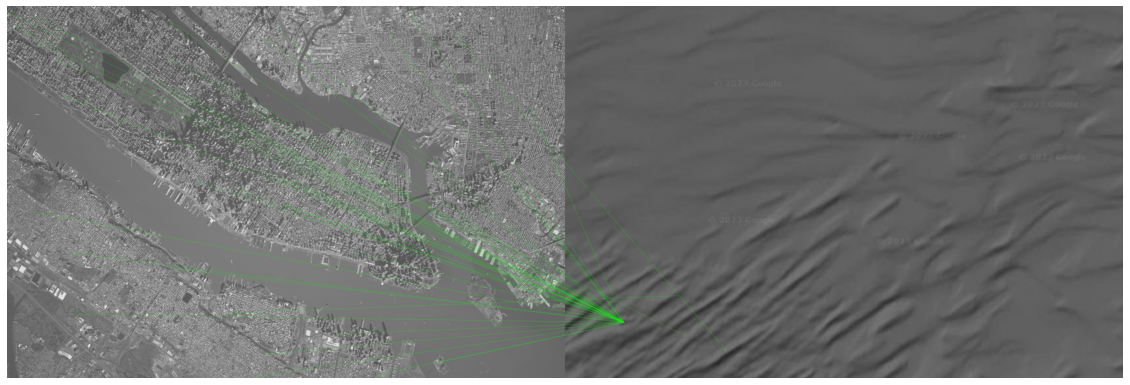

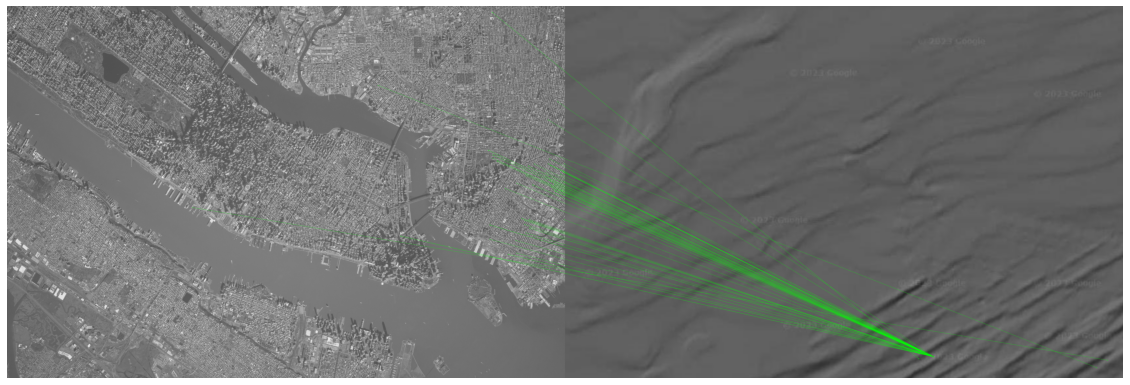

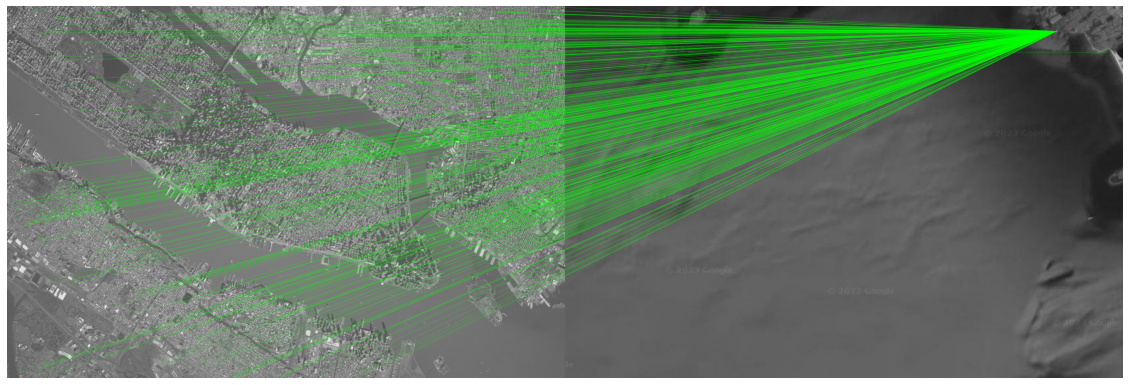

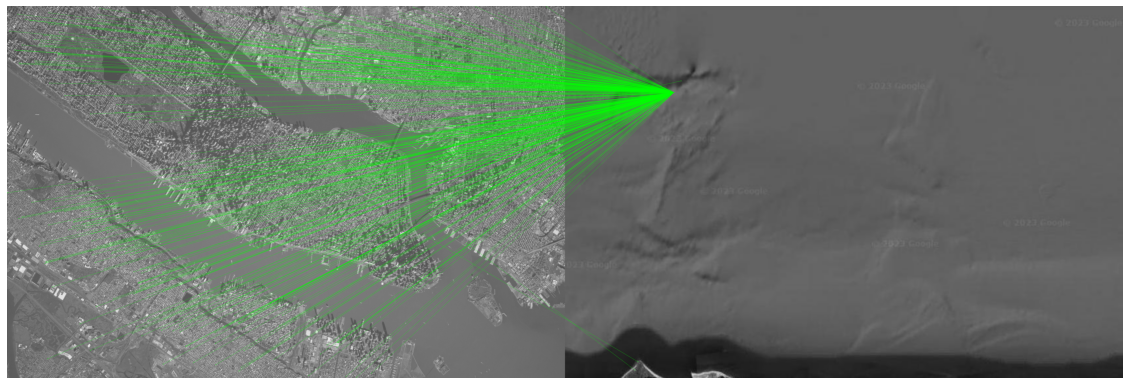

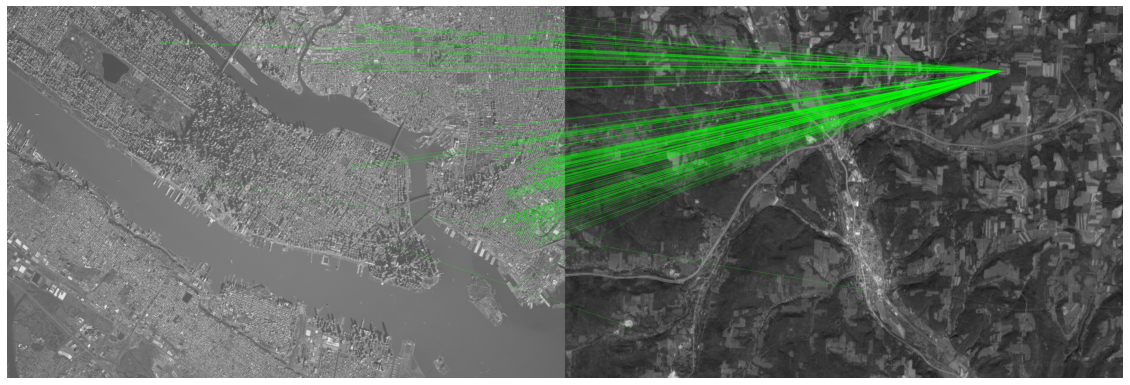

In [2]:
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def sift_detect_and_compute(image):
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(image, None)
    return keypoints, descriptors

def match_features(descriptors1, descriptors2):
    matcher = cv2.BFMatcher()
    matches = matcher.knnMatch(descriptors1, descriptors2, k=2)
    return matches

def filter_good_matches(matches):
    good_matches = []
    for match_pair in matches:
        # Ensuring that there are two matches to unpack
        if len(match_pair) == 2:
            m, n = match_pair
            if m.distance < 0.75 * n.distance:
                good_matches.append(m)
    return good_matches

def find_homography(keypoints1, keypoints2, good_matches):
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    return M, mask

def visualize_matches(image1, keypoints1, image2, keypoints2, matches, mask):
    draw_params = dict(matchColor=(0, 255, 0), 
                       singlePointColor=None,
                       matchesMask=mask.ravel().tolist(),
                       flags=2)
    img_matches = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches, None, **draw_params)
    
    # Convert BGR to RGB for matplotlib
    img_matches = cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB)

    # Display the image with matplotlib
    plt.figure(figsize=(20, 10))
    plt.imshow(img_matches)
    plt.axis('off') # Hide the axis
    plt.show()

# Dictionary to store matching results
matching_results = {}

def match_query_to_scene(query_image, scene_image_path):
    # Load the scene image
    scene_image = cv2.imread(scene_image_path, cv2.IMREAD_GRAYSCALE)

    # Check if image loaded correctly
    if scene_image is None:
        raise ValueError(f"Could not load the scene image from path: {scene_image_path}")
        
    # Resize the scene image to match the query image dimensions
    scene_image = cv2.resize(scene_image, (query_image.shape[1], query_image.shape[0]))


    print(f"Matching features with scene image: {scene_image_path}")
    keypoints_scene, descriptors_scene = sift_detect_and_compute(scene_image)
    
    # Check if descriptors are valid
    if descriptors_scene is None or descriptors_query is None:
        print(f"No descriptors found for {scene_image_path}. Skipping.")
        return

    # Additional check for data type consistency
    if descriptors_scene.dtype != descriptors_query.dtype:
        print(f"Descriptor data type mismatch for {scene_image_path}. Skipping.")
        return

    matches = match_features(descriptors_query, descriptors_scene)
    good_matches = filter_good_matches(matches)

    if len(good_matches) > 10:
        M, mask = find_homography(keypoints_query, keypoints_scene, good_matches)
        matchesMask = mask.ravel().tolist()
        num_inliers = sum(matchesMask)
        matching_percentage = (num_inliers / len(good_matches)) * 100
        matching_results[scene_image_path] = matching_percentage
    else:
        print(f"Not enough matches are found for {scene_image_path} - {len(good_matches)}/{10}")


# Load the query image
query_image_path = '../data/manhattan_dataset/manhattan_query_image.jpg'
query_image = cv2.imread(query_image_path, cv2.IMREAD_GRAYSCALE)

# Check if query image loaded correctly
if query_image is None:
    raise ValueError("Could not load the query image. Check the file path.")
    
    

print("Detecting features and computing descriptors for the query image...")
keypoints_query, descriptors_query = sift_detect_and_compute(query_image)
print("Done.")

# Path to the folder containing all the scene images
scene_images_folder = '../data/manhattan_dataset/manhattan_subsample_output/*'

# Use glob to find all the image files in the folder
scene_images_paths = glob.glob(scene_images_folder)

# Check if scene images are found
if not scene_images_paths:
    raise ValueError(f"No images found in the folder: {scene_images_folder}")

# Match query image to each scene image
for scene_image_path in scene_images_paths:
    match_query_to_scene(query_image, scene_image_path)

# Sort results and get top 5 matches
top_matches = sorted(matching_results.items(), key=lambda x: x[1], reverse=True)[:5]

# Print results table
print("Matching Results:")
for path, percentage in top_matches:
    print(f"{path}: {percentage:.2f}%")

# Visualize top 5 matches
for path, _ in top_matches:
    scene_image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    scene_image = cv2.resize(scene_image, (query_image.shape[1], query_image.shape[0]))
    keypoints_scene, descriptors_scene = sift_detect_and_compute(scene_image)
    matches = match_features(descriptors_query, descriptors_scene)
    good_matches = filter_good_matches(matches)
    M, mask = find_homography(keypoints_query, keypoints_scene, good_matches)
    visualize_matches(query_image, keypoints_query, scene_image, keypoints_scene, good_matches, mask)

In [3]:
# Print the full sorted matching results dictionary
print("\nFull Sorted Matching Results Dictionary:")
print({k: f"{v:.2f}%" for k, v in sorted(matching_results.items(), key=lambda x: x[1], reverse=True)})



Full Sorted Matching Results Dictionary:
{'./subsample_output/subsample_4240_4528.jpg': '45.16%', './subsample_output/subsample_3392_4528.jpg': '42.18%', './subsample_output/subsample_1696_3396.jpg': '41.90%', './subsample_output/subsample_15264_14716.jpg': '37.72%', './subsample_output/subsample_1696_9622.jpg': '34.81%', './subsample_output/subsample_11872_9056.jpg': '32.44%', './subsample_output/subsample_15264_16414.jpg': '31.95%', './subsample_output/subsample_4240_5094.jpg': '31.05%', './subsample_output/subsample_5088_3396.jpg': '29.48%', './subsample_output/subsample_19504_20376.jpg': '28.28%', './subsample_output/subsample_7632_7924.jpg': '27.59%', './subsample_output/subsample_19504_4528.jpg': '26.19%', './subsample_output/subsample_13568_4528.jpg': '25.93%', './subsample_output/subsample_11024_566.jpg': '25.88%', './subsample_output/subsample_10176_7924.jpg': '23.93%', './subsample_output/subsample_1696_14150.jpg': '22.58%', './subsample_output/subsample_16960_15848.jpg': '2

In [4]:
# Sort the matching results by percentage and get the top 10
top_10_matches = sorted(matching_results.items(), key=lambda x: x[1], reverse=True)[:10]

# Print the top 10 matching images with their names and matching percentages
print("\nTop 10 Matching Images:")
for name, percentage in top_10_matches:
    print(f"{name}: {percentage:.2f}%")



Top 10 Matching Images:
./subsample_output/subsample_4240_4528.jpg: 45.16%
./subsample_output/subsample_3392_4528.jpg: 42.18%
./subsample_output/subsample_1696_3396.jpg: 41.90%
./subsample_output/subsample_15264_14716.jpg: 37.72%
./subsample_output/subsample_1696_9622.jpg: 34.81%
./subsample_output/subsample_11872_9056.jpg: 32.44%
./subsample_output/subsample_15264_16414.jpg: 31.95%
./subsample_output/subsample_4240_5094.jpg: 31.05%
./subsample_output/subsample_5088_3396.jpg: 29.48%
./subsample_output/subsample_19504_20376.jpg: 28.28%
